In [26]:
import json
from pymongo import MongoClient, GEO2D
from utils.func import *

# 1 - Data extraction From OSM

# You can create the query from https://overpass-turbo.eu/  


You can run a query and copie the result, or even you can copy the url query with the full **parameters (recommended)**  
Because you'll encounter some errors when requesting the data for instance the geocodeArea **(Underlined in green)**  
*geocodeArea:Tunisia* becomes *area(id:3600192757)* <-- You can get this value when you click on Export **(orange Button)**  


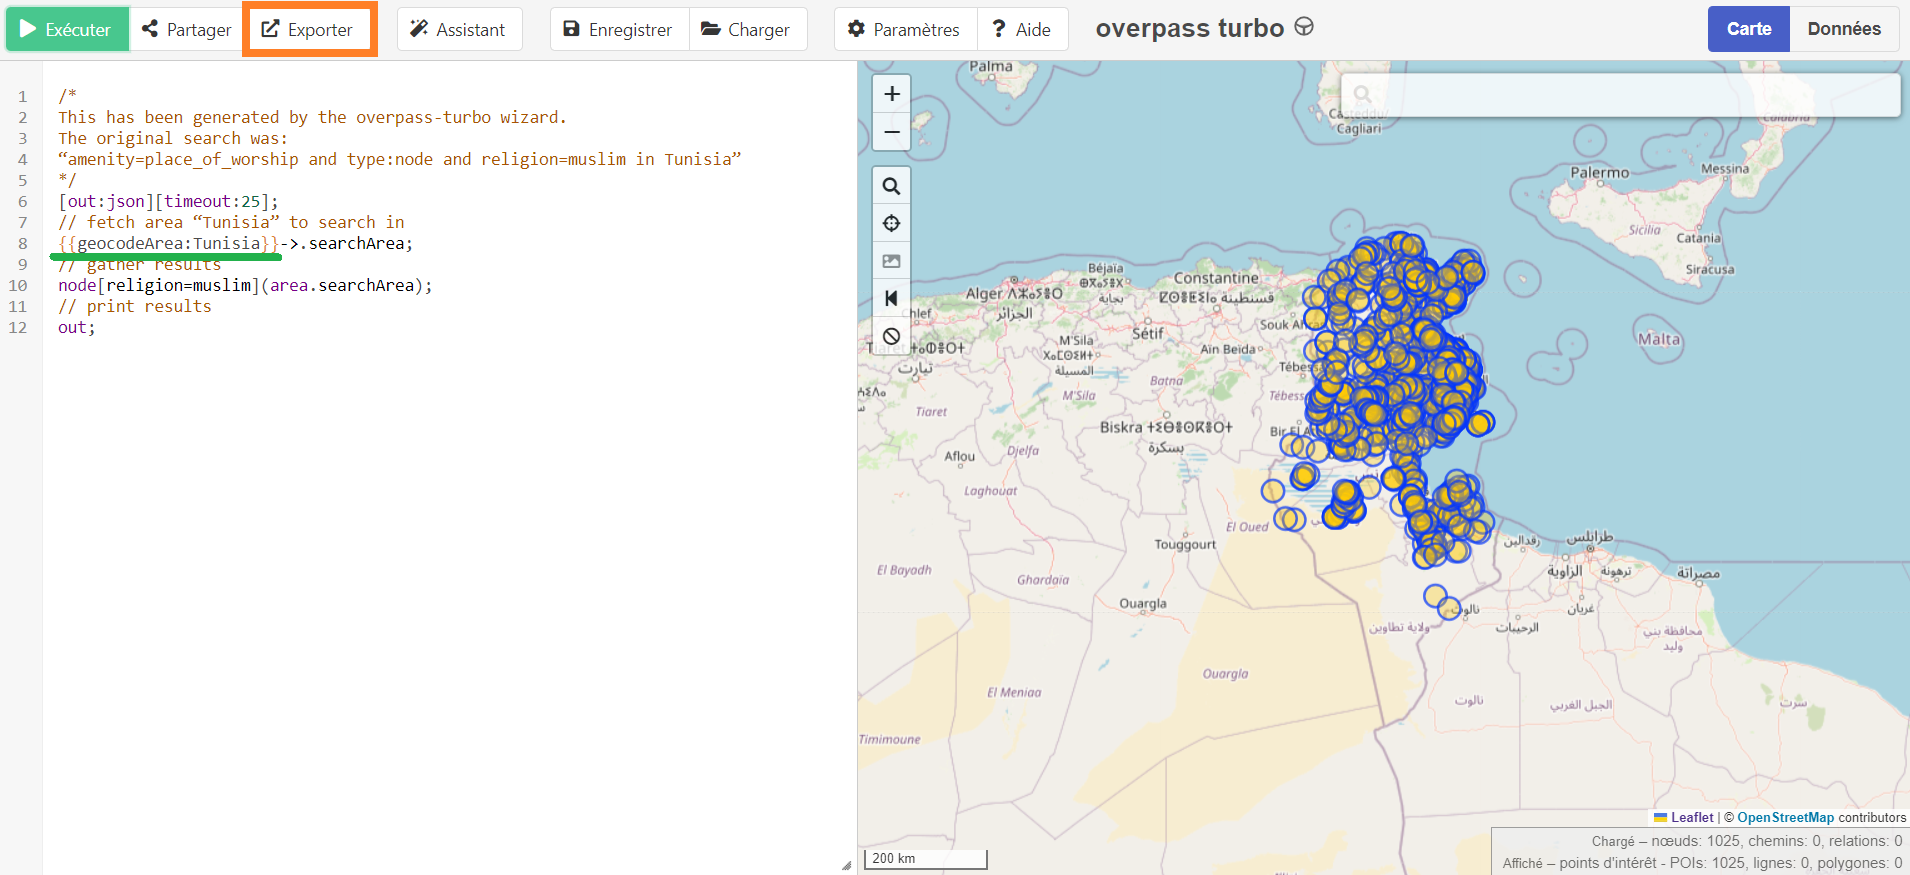

In [2]:
Tunisia_area_id = 3600192757
tags = {'religion':'muslim',
        'amenity':'place_of_worship'}
result = result_search_overpy(area_id=Tunisia_area_id, tags=tags)

In [3]:
gdf = osm_to_gdf(result=result)

# Transform the GeoDataFrame to GeoJSON object

In [4]:
gdf_as_dict = json.loads(gdf.to_json())

# There are many keys with empty values we need to remove them  
if we take a quick look at the first element below we'll see that it contains null values  
To remove them I've created a function that takes in a json *(dict)* object and remove all the keys that has null values 

In [5]:
gdf_as_dict['features'][0]

{'id': '0',
 'type': 'Feature',
 'properties': {'addr:city': None,
  'addr:city:ar': None,
  'addr:housenumber': None,
  'addr:place': None,
  'addr:place:ar': None,
  'addr:postcode': None,
  'addr:street': None,
  'addr:street:ar': None,
  'addr:suburb': None,
  'addr:suburb:ar': None,
  'alt_name': None,
  'alt_name:ar': None,
  'alt_name:fr': None,
  'amenity': 'place_of_worship',
  'barrier': None,
  'building': None,
  'check_date': None,
  'denomination': None,
  'historic': None,
  'id': 322933377,
  'landuse': None,
  'language:ar': None,
  'long_name': None,
  'long_name:ar': None,
  'name': 'Sidi amor Abada',
  'name:ar': None,
  'name:en': None,
  'name:fr': None,
  'name:ru': None,
  'opening_hours': None,
  'postal_code': None,
  'religion': 'muslim',
  'source': None,
  'wheelchair': None,
  'wikidata': None,
  'wikimedia_commons': None,
  'wikipedia': None,
  'wikipedia:ar': None},
 'geometry': {'type': 'Point', 'coordinates': [35.6771977, 10.0949875]}}

In [6]:
json_no_null = remove_null_values(gdf_as_dict)

# Exploring the result of the non null features

In [9]:
json_no_null['features'][0]

{'id': '0',
 'type': 'Feature',
 'properties': {'amenity': 'place_of_worship',
  'id': 322933377,
  'name': 'Sidi amor Abada',
  'religion': 'muslim'},
 'geometry': {'type': 'Point', 'coordinates': [35.6771977, 10.0949875]}}

# 2 - Inserting the data into the collection of the Mongodb database

# Mongodb installation and creation of db and a collection to store the data  
You can download [**mongodb compass**](https://www.mongodb.com/try/download/compass) to manage your databases locally if you didn't already
- You need first to create throught mongodb compass UI a database and a collection where to store your data. [Example](https://www.mongodb.com/docs/compass/current/databases/#create-a-database)
- Alternatively you can create a database and a collection in many other ways for example by running python commands like the example below

In [29]:
my_database_name = 'masjid_db' # choose which name that suits your needs a simple meaningful name is always the best
mg_client = MongoClient()
my_database = mg_client.get_database(my_database_name)

In [36]:
collection_name = 'masjids' # I have choosen also a simple collection name
try:
    masjids_collection = my_database.create_collection(collection_name)
except:
    masjids_collection = my_database.get_collection(collection_name)

### Create a geospatial index  
You can create a [geospatial index](https://www.mongodb.com/docs/manual/core/indexes/index-types/index-geospatial/) that satisfy your needs 

In [32]:
masjids_collection.create_index(('geometry',GEO2D))

'geometry_1_2d_1'

### Insert the data into the collection

In [34]:
features = json_no_null['features']
masjids_collection.insert_many(features)

InsertManyResult([ObjectId('658d5ac855451e99ced0896c'), ObjectId('658d5ac855451e99ced0896d'), ObjectId('658d5ac855451e99ced0896e'), ObjectId('658d5ac855451e99ced0896f'), ObjectId('658d5ac855451e99ced08970'), ObjectId('658d5ac855451e99ced08971'), ObjectId('658d5ac855451e99ced08972'), ObjectId('658d5ac855451e99ced08973'), ObjectId('658d5ac855451e99ced08974'), ObjectId('658d5ac855451e99ced08975'), ObjectId('658d5ac855451e99ced08976'), ObjectId('658d5ac855451e99ced08977'), ObjectId('658d5ac855451e99ced08978'), ObjectId('658d5ac855451e99ced08979'), ObjectId('658d5ac855451e99ced0897a'), ObjectId('658d5ac855451e99ced0897b'), ObjectId('658d5ac855451e99ced0897c'), ObjectId('658d5ac855451e99ced0897d'), ObjectId('658d5ac855451e99ced0897e'), ObjectId('658d5ac855451e99ced0897f'), ObjectId('658d5ac855451e99ced08980'), ObjectId('658d5ac855451e99ced08981'), ObjectId('658d5ac855451e99ced08982'), ObjectId('658d5ac855451e99ced08983'), ObjectId('658d5ac855451e99ced08984'), ObjectId('658d5ac855451e99ced089